# Import modules

In [1]:
# Code by: O, Wani, 2021

import numpy as np                      # for scientific computing and array analysis
import pandas as pd                     # for working with data strcutures
from scipy.integrate import odeint      # for working with ordinary differential equations
import scipy.stats as stats

# displaying plots inline 
%matplotlib inline                      

import matplotlib.pyplot as plt         # for 2D plotting

import math                             # for mathematical functions defined by the C standard
import statsmodels.api as sm            # for autocorrelation function
import os                               # for interacting with the operating system
import seaborn as sns                   # for 3D plotting
import astroabc                         # for inference of SDE parameters
import ipynb                            # for importing ipynb files as modules
import random                           # for pseudo-random number generators
import timeit

os.chdir('/home/waniomar/Office/Berkeley/Scripts/sde') # set working directory


In [2]:
from ipynb.fs.full.import_data import get_data, get_station_name 
# Import data

# import helper functions
from CatchmentBasics import *
from Data_analysis_helper import *

### Selected catchments

In [3]:
#### Numbers ####

#  SagehenCreek  - 3
#  Harvard       - 12
#  Hubbard       - 13
#  PlumIsland    - 18
#  Shale Hills   - 26


# Load data


In [4]:
# Define variables that contain the data of all catchments
discharge_obs= np.zeros([5,3000])
rain_obs = np.zeros([5,3000])
Temp_obs = np.zeros([5,3000])

In [5]:
#HJ Andrews
# load time series of rainfall, discharge, temperature 

Temp = np.array(get_data(4,['AirTemperature']).loc['2005-1-1':'2015-1-1'].mean(axis=1))[0:3000]
rain = np.array(get_data(4,['Precipitation']).loc['2005-1-1':'2015-1-1'].mean(axis=1))[0:3000]
A_discharge = np.asarray(get_data(4,['Discharge']).loc['2005-1-1':'2015-1-1'][0:3000]['GSLOOK_Discharge'])
discharge =A_discharge/np.mean(A_discharge)
discharge_obs[0,:] = discharge
rain_obs[0,:] = rain
Temp_obs[0,:] = Temp
#temp = get_data(4,['AirTemperature']).loc['2005-1-1':'2015-1-1'][0:3000]['VANMET_AirTemperature_50cm']
#temp[temp<0]=0
#swe = get_data(4,['SWE']).loc['2005-1-1':'2015-1-1'][0:3000]['VANMET_SWE']
#sweb = swe/np.amax(swe)

# A = 0.1

HJAndrews
Hydrometeorological variables in this watershed are:
['Discharge', 'Precipitation', 'AirTemperature', 'SolarRadiation', 'RelativeHumidity', 'WindDirection', 'WindSpeed', 'SWE', 'SnowDepth', 'Snowmelt', 'VaporPressure', 'SoilTemperature', 'SoilMoisture']
HJAndrews
Hydrometeorological variables in this watershed are:
['Discharge', 'Precipitation', 'AirTemperature', 'SolarRadiation', 'RelativeHumidity', 'WindDirection', 'WindSpeed', 'SWE', 'SnowDepth', 'Snowmelt', 'VaporPressure', 'SoilTemperature', 'SoilMoisture']
HJAndrews
Hydrometeorological variables in this watershed are:
['Discharge', 'Precipitation', 'AirTemperature', 'SolarRadiation', 'RelativeHumidity', 'WindDirection', 'WindSpeed', 'SWE', 'SnowDepth', 'Snowmelt', 'VaporPressure', 'SoilTemperature', 'SoilMoisture']


In [6]:
#  Harvard       - 12
# load time series of rainfall, discharge, temperature 

Temp =  np.array(get_data(12,['AirTemperature']).loc['2008-1-1':'2018-1-1'].mean(axis=1))[0:3000]
rain =  np.asarray(get_data(12,['Precipitation']).loc['2008-1-1':'2018-1-1'][0:3000]['HF001_Precipitation'])
A_discharge = np.asarray(get_data(12,['Discharge']).loc['2008-1-1':'2018-1-1'][0:3000]['NelsonWeir_Discharge'])
discharge =A_discharge/np.mean(A_discharge)
discharge_obs[1,:] = discharge
rain_obs[1,:] = rain
Temp_obs[1,:] = Temp

Harvard
Hydrometeorological variables in this watershed are:
['Discharge', 'Precipitation', 'AirTemperature', 'SolarRadiation', 'RelativeHumidity', 'WindDirection', 'WindSpeed', 'SWE', 'SnowDepth', 'SoilMoisture']
Harvard
Hydrometeorological variables in this watershed are:
['Discharge', 'Precipitation', 'AirTemperature', 'SolarRadiation', 'RelativeHumidity', 'WindDirection', 'WindSpeed', 'SWE', 'SnowDepth', 'SoilMoisture']
Harvard
Hydrometeorological variables in this watershed are:
['Discharge', 'Precipitation', 'AirTemperature', 'SolarRadiation', 'RelativeHumidity', 'WindDirection', 'WindSpeed', 'SWE', 'SnowDepth', 'SoilMoisture']


In [7]:
# Hubbard 13
# load time series of rainfall, discharge, temperature 

Temp =  np.array(get_data(13,['AirTemperature']).loc['2005-1-1':'2015-1-1'].mean(axis=1))[0:3000]
rain =  np.asarray(get_data(13,['Precipitation']).loc['2005-1-1':'2015-1-1'][0:3000]['WS7_Precipitation'])
A_discharge = np.asarray(get_data(13,['Discharge']).loc['2005-1-1':'2015-1-1'][0:3000]['WS7_Discharge'])
discharge = A_discharge/np.mean(A_discharge)
discharge_obs[2,:] = discharge
rain_obs[2,:] = rain
Temp_obs[2,:] = Temp

Hubbard
Hydrometeorological variables in this watershed are:
['Discharge', 'Precipitation', 'AirTemperature', 'SolarRadiation', 'WindDirection', 'WindSpeed', 'VaporPressure']
Hubbard
Hydrometeorological variables in this watershed are:
['Discharge', 'Precipitation', 'AirTemperature', 'SolarRadiation', 'WindDirection', 'WindSpeed', 'VaporPressure']
Hubbard
Hydrometeorological variables in this watershed are:
['Discharge', 'Precipitation', 'AirTemperature', 'SolarRadiation', 'WindDirection', 'WindSpeed', 'VaporPressure']


In [8]:
#  PlumIsland     - 18
# load time series of rainfall, discharge, temperature 

Temp =  np.array(get_data(18,['AirTemperature']).loc['2005-1-1':'2015-1-1'].mean(axis=1))[0:3000]
rain =  np.asarray(get_data(18,['Precipitation']).loc['2005-1-1':'2015-1-1'][0:3000]['PIE_Precipitation'])
A_discharge = np.asarray(get_data(18,['Discharge']).loc['2005-1-1':'2015-1-1'][0:3000]['Middleton_Discharge'])
discharge = A_discharge/np.mean(A_discharge)
discharge_obs[3,:] = discharge
rain_obs[3,:] = rain
Temp_obs[3,:] = Temp

# A = 3

PlumIsland
Hydrometeorological variables in this watershed are:
['Discharge', 'Precipitation', 'AirTemperature', 'RelativeHumidity']
PlumIsland
Hydrometeorological variables in this watershed are:
['Discharge', 'Precipitation', 'AirTemperature', 'RelativeHumidity']
PlumIsland
Hydrometeorological variables in this watershed are:
['Discharge', 'Precipitation', 'AirTemperature', 'RelativeHumidity']


In [9]:
# Kellog 15
# load time series of rainfall, discharge, temperature 

Temp =  np.array(get_data(15,['AirTemperature']).loc['2005-1-1':'2015-1-1'].mean(axis=1))[0:3000]
rain =  np.asarray(get_data(15,['Precipitation']).loc['2005-1-1':'2015-1-1'][0:3000]['KBS002_Precipitation'])
A_discharge = np.asarray(get_data(15,['Discharge']).loc['2005-1-1':'2015-1-1'][0:3000]['KBS096_Discharge'])
discharge =A_discharge/np.mean(A_discharge)
discharge_obs[4,:] = discharge
rain_obs[4,:] = rain
Temp_obs[4,:] = Temp

Kellogg
Hydrometeorological variables in this watershed are:
['Discharge', 'Precipitation', 'AirTemperature', 'SolarRadiation', 'RelativeHumidity', 'WindDirection', 'WindSpeed', 'SnowDepth']
Kellogg
Hydrometeorological variables in this watershed are:
['Discharge', 'Precipitation', 'AirTemperature', 'SolarRadiation', 'RelativeHumidity', 'WindDirection', 'WindSpeed', 'SnowDepth']
Kellogg
Hydrometeorological variables in this watershed are:
['Discharge', 'Precipitation', 'AirTemperature', 'SolarRadiation', 'RelativeHumidity', 'WindDirection', 'WindSpeed', 'SnowDepth']


# Define SDE

The rainfall runoff model can be described as a stochastic differential equation:


$d\mathcal{S}_t= [\mathcal{R}_t+\mathcal{M}_t-\mathcal{E}_t-\mathcal{Q}_t]\cdot dt+g(\mathcal{S}_t,\mathcal{R}_t)\cdot dW_t$ 

We see that: $ d\mathcal{Q}/d\mathcal{S} = \frac{(d\mathcal{Q}/dt)}{(d\mathcal{S}/dt)}$

Such that:
$ d\mathcal{Q}/d\mathcal{S} = \frac{(d\mathcal{Q}/dt)}{\mathcal{R}_t-\mathcal{Q}_t-\mathcal{M}_t-\mathcal{E}_t}$

We know that the recession equation for catchments, according to Brutsaert and Nieber [1977], is:
$-d\mathcal{Q}/dt = a\mathcal{Q}^b$

Assuming: $\mathcal{Q} \gg \mathcal{R}, \mathcal{M}, \mathcal{E} \\$
$ d\mathcal{Q}/d\mathcal{S} = \frac{(d\mathcal{Q}/dt)}{-\mathcal{Q}}$;
$ d\mathcal{Q}/d\mathcal{S} = a\mathcal{Q}^{b-1}$

Integrating both sides

$\int d\mathcal{S} = \int \frac{1}{a}\mathcal{Q}^{1-b}d\mathcal{Q}\\ $
$\mathcal{Q}=f(\mathcal{S})=\mathcal{Q_{ref}}(\mathcal{S}-\mathcal{S_o})^{1/(2-b)}/k$

Now let us define our modules for snowmelt and evapotranspiration 
(assuming they will have model deficits, which will be taken into account by the stochasticity in the SDE)

$\mathcal{M} = \texttt{ddf}\cdot (T-T_1)\\$
$\mathcal{E} =  E_{max}\cdot \frac{(T-T_{min})}{(T_{max}-T_{min})} + E_{min}\cdot \frac{(T_{max}-T)}{(T_{max}-T_{min})}$

The final effective discharge will be equal to 
$\mathcal{Q_{eff}}=A\cdot \mathcal{Q}$

The subprocesses we have: $\mathcal{S},\mathcal{R},\mathcal{M},\mathcal{E}$

The parameters we have: $A,b,k,\mathcal{S_o},\mathcal{Q_{ref}},\texttt{ddf},E_{max},E_{min}$

In [10]:
# Plots with uncertainty intervals

def sde(par, rain, Temp, runs, dt =1 , T = 3000):
    
    n = int(T / dt)  # Number of time steps.
    t = np.linspace(0., T, n)  # Vector of times.
    x = np.ones([n,runs])
    Qeff = np.ones([n,runs])
    A=par[0]; b=par[1]; k=par[2]; Qref=par[3]; ddf=par[4]; 
    Emax=par[5]; Emin=par[6];es=par[7] 
    
    E = Emax*(Temp-Temp.min())/(Temp.max()-Temp.min()) + Emin*(Temp.max()-Temp)/(Temp.max()-Temp.min())
    M = ddf*np.maximum(Temp,0)
    
    for j in range(runs):
        for i in range(n - 1):
            x[i + 1,j] = x[i,j] + (rain[i]-E[i]+M[i]-Qref*((x[i,j])/k)**(1/(2-b)))*dt + (es*x[i,j])*np.random.normal(0,np.sqrt(dt),1)

        if np.isnan(np.sum(x[0:n,j]))==False:
            Qeff[:,j] = (A*(Qref*((x[0:n,j])/k)**(1/(2-b))))
        else: 
            Qeff[:,j] = np.full(n, np.inf)
    
    return Qeff.flatten() 

In [11]:
# Define parameters
par0 = {'A':0.2,'b':1.0,'k':2.,'Qref':0.3,'ddf':0.0,'Emax':0.0,'Emin':0.,'es':0.25}  
par1 = {'A':0.1,'b':1.0,'k':2.,'Qref':0.3,'ddf':0.2,'Emax':0.0,'Emin':0.,'es':0.25}  
par2 = {'A':0.5,'b':1.0,'k':2.,'Qref':0.3,'ddf':0.0,'Emax':0.0,'Emin':0.,'es':0.25}  
par3 = {'A':0.4,'b':1.0,'k':2.,'Qref':0.3,'ddf':0.0,'Emax':0.0,'Emin':0.,'es':0.25}  
par4 = {'A':0.15,'b':1.0,'k':2.,'Qref':0.3,'ddf':0.0,'Emax':0.0,'Emin':0.,'es':0.25}  
# as a dictionary

par = np.empty((5,8))


for i in range(5):
    par[i,:] = np.array(list(eval('{}{}'.format('par', i)).values())) # as an np.array

# Compute transfer entropy

In [12]:
from PyIF import te_compute as te
rand = np.random.RandomState(seed=23)

X_1000 = rain_obs[4,:]
Y_1000 = discharge_obs[4,:]
Y_1000 = sde(par[4,:], rain_obs[4,:], Temp_obs[4,:],runs =1)

TE = te.te_compute(X_1000, Y_1000, k=1, embedding=1, safetyCheck=False, GPU=False)

print(TE)

/home/waniomar/anaconda3/lib/python3.8/site-packages/numba/core/decorators.py:252: RuntimeWarning: nopython is set for njit and is ignored
  warnings.warn('nopython is set for njit and is ignored', RuntimeWarning)


4.3407615226790695


# Preliminary anlysis of the storage-discharge relationship

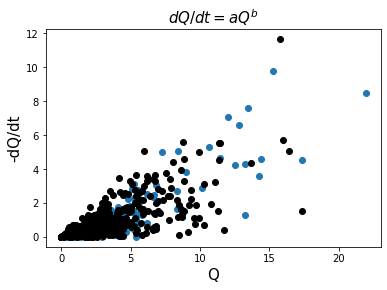

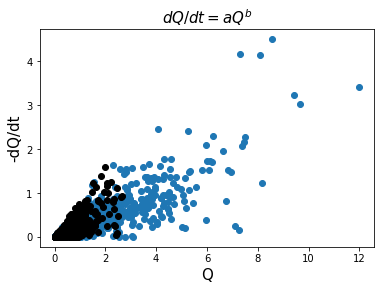

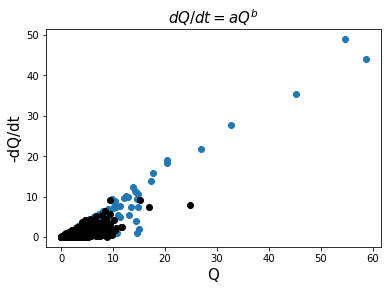

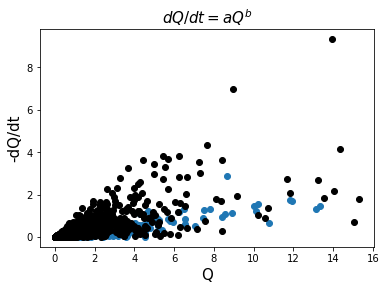

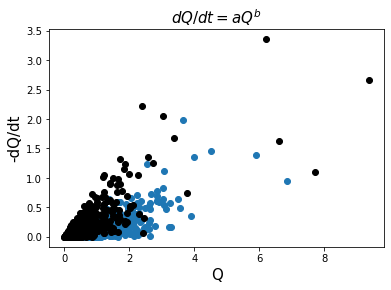

In [13]:
for i in range(5):
    par[i,:]
    #par_test = {'A':1,'b':1.,'k':2.,'Qref':0.3,'ddf':0.0,'Emax':0.0,'Emin':0.,'es':0.0} 
    #par_test = np.array(list(par_test.values()))

    
    plt.figure(i)
    
    Q = discharge_obs[i,:]
    indices = [i for i in range(len(Q)-4) if (Q[i]>Q[i+1]>Q[i+2]>Q[i+3])] 
    #discharge_special = discharge_obs[i,:][np.where(rain_obs[i,:]<=0.0*np.max(rain_obs[i,:]))]
    discharge_special = Q[indices]    
    dQ = np.diff(discharge_special)

    ind = np.where(np.diff(np.where(dQ<0))==1)    
    plt.scatter(y=-dQ[dQ<0],x=discharge_special[np.where(dQ<0)])
    #plt.yscale('log')
    #plt.xscale('log')
    #plt.xlim(0.1, 55)
    #plt.ylim(0.01, 55)
    plt.ylabel('-dQ/dt', fontsize = 15)
    plt.xlabel('Q', fontsize = 15)
    plt.title('$dQ/dt=aQ^b$', fontsize = 15)
    
    
    discharge = sde(par[i,:], rain_obs[i,:], Temp_obs[i,:],runs =1).flatten()
    Q = discharge
    #indices = [i for i in range(len(Q)-4) if (Q[i]<Q[i+1]<Q[i+2]<Q[i+3])] 
    #discharge_special = discharge[np.where(rain_obs[i,:]<=0.0*np.max(rain_obs[i,:]))]
    discharge_special = Q[indices] 
    dQ = np.diff(discharge_special)
        
    plt.scatter(y=-dQ[dQ<0],x=discharge_special[np.where(dQ<0)],color ="black")
    #plt.yscale('log')
    #plt.xscale('log')
    #plt.xlim(0.1, 55)
    #plt.ylim(0.01, 55)
    plt.ylabel('-dQ/dt', fontsize = 15)
    plt.xlabel('Q', fontsize = 15)
    plt.title('$dQ/dt=aQ^b$', fontsize = 15)

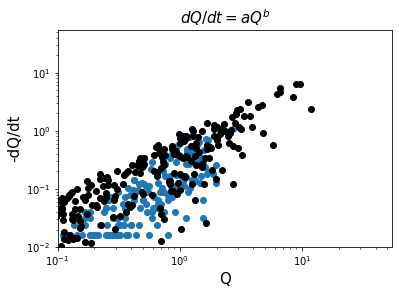

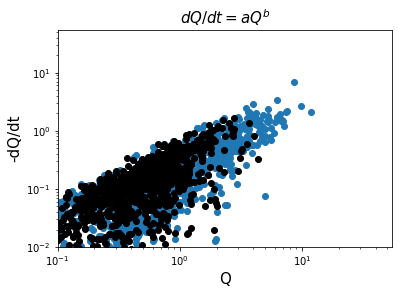

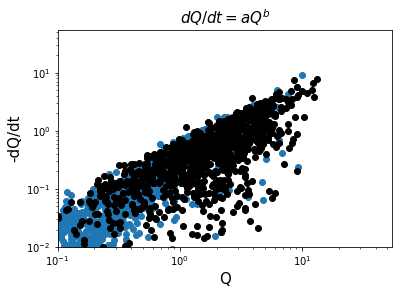

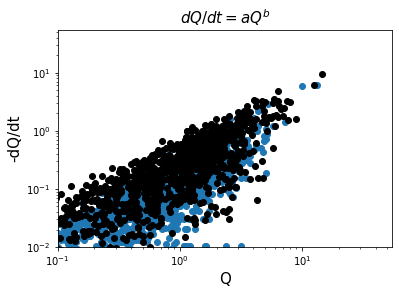

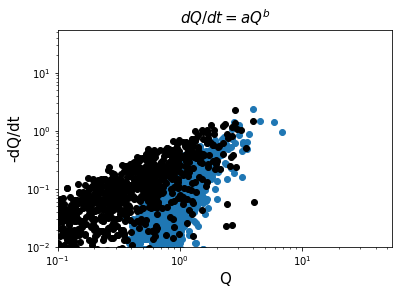

In [14]:
for i in range(5):
    par[i,:]
    #par_test = {'A':1,'b':1.,'k':2.,'Qref':0.3,'ddf':0.0,'Emax':0.0,'Emin':0.,'es':0.0} 
    #par_test = np.array(list(par_test.values()))

    
    plt.figure(i)

    discharge_special = discharge_obs[i,:][np.where(rain_obs[i,:]<=0.0*np.max(rain_obs[i,:]))]
    dQ = np.diff(discharge_special)

    plt.scatter(y=-dQ[dQ<0],x=discharge_special[np.where(dQ<0)])
    plt.yscale('log')
    plt.xscale('log')
    plt.xlim(0.1, 55)
    plt.ylim(0.01, 55)
    plt.ylabel('-dQ/dt', fontsize = 15)
    plt.xlabel('Q', fontsize = 15)
    plt.title('$dQ/dt=aQ^b$', fontsize = 15)
    
    
    discharge = sde(par[i,:], rain_obs[i,:], Temp_obs[i,:],runs =1).flatten()
    discharge_special = discharge[np.where(rain_obs[i,:]<=0.0*np.max(rain_obs[i,:]))]
    dQ = np.diff(discharge_special)
        
    plt.scatter(y=-dQ[dQ<0],x=discharge_special[np.where(dQ<0)],color ="black")
    plt.yscale('log')
    plt.xscale('log')
    plt.xlim(0.1, 55)
    plt.ylim(0.01, 55)
    plt.ylabel('-dQ/dt', fontsize = 15)
    plt.xlabel('Q', fontsize = 15)
    plt.title('$dQ/dt=aQ^b$', fontsize = 15)

(array([-30, -29, -28, -27, -26, -25, -24, -23, -22, -21, -20, -19, -18,
        -17, -16, -15, -14, -13, -12, -11, -10,  -9,  -8,  -7,  -6,  -5,
         -4,  -3,  -2,  -1,   0,   1,   2,   3,   4,   5,   6,   7,   8,
          9,  10,  11,  12,  13,  14,  15,  16,  17,  18,  19,  20,  21,
         22,  23,  24,  25,  26,  27,  28,  29,  30]),
 array([0.38617851, 0.38933482, 0.3943692 , 0.40087711, 0.40683886,
        0.41065778, 0.41184243, 0.41556828, 0.42428099, 0.43337251,
        0.44513288, 0.45298359, 0.45455038, 0.45758263, 0.46338571,
        0.46527204, 0.46987773, 0.48010307, 0.49494577, 0.51753123,
        0.54035512, 0.56429454, 0.58902933, 0.61525168, 0.64949766,
        0.68843646, 0.73372101, 0.79272284, 0.86101276, 0.93502285,
        1.        , 0.93502285, 0.86101276, 0.79272284, 0.73372101,
        0.68843646, 0.64949766, 0.61525168, 0.58902933, 0.56429454,
        0.54035512, 0.51753123, 0.49494577, 0.48010307, 0.46987773,
        0.46527204, 0.46338571, 0.4575826

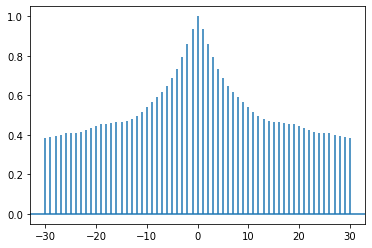

In [15]:
plt.acorr(discharge, maxlags = 30)

# Generate hydrographs

In [16]:
# Define parameters
par0 = {'A':0.2,'b':1.0,'k':2.,'Qref':0.3,'ddf':0.0,'Emax':0.0,'Emin':0.,'es':0.35}  
par1 = {'A':0.3,'b':1.0,'k':2.,'Qref':0.3,'ddf':0.2,'Emax':0.0,'Emin':0.,'es':0.25}  
par2 = {'A':1.0,'b':1.0,'k':2.,'Qref':0.3,'ddf':0.0,'Emax':0.0,'Emin':0.,'es':0.25}  
par3 = {'A':0.4,'b':1.0,'k':2.,'Qref':0.3,'ddf':0.0,'Emax':0.0,'Emin':0.,'es':0.1}  
par4 = {'A':.2,'b':1.0,'k':2.,'Qref':0.3,'ddf':0.0,'Emax':0.0,'Emin':0.,'es':0.35}  
# as a dictionary

par = np.empty((5,8))


for i in range(5):
    par[i,:] = np.array(list(eval('{}{}'.format('par', i)).values())) # as an np.array

In [17]:
discharge_sim = np.zeros([5,3000])

for i in range(5):
    discharge_sim[i,:] = sde(par[i,:], rain_obs[i,:], Temp_obs[i,:],runs =1).flatten()

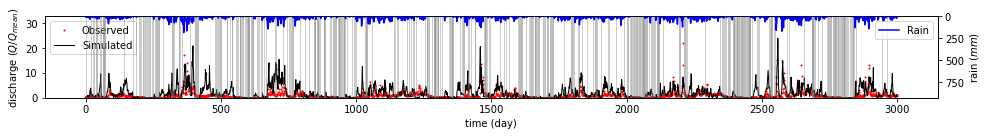

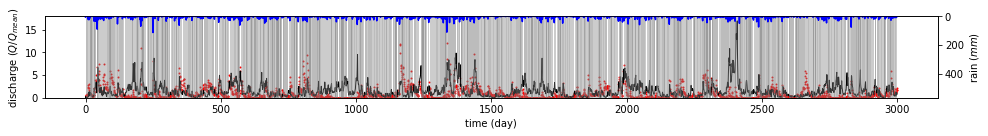

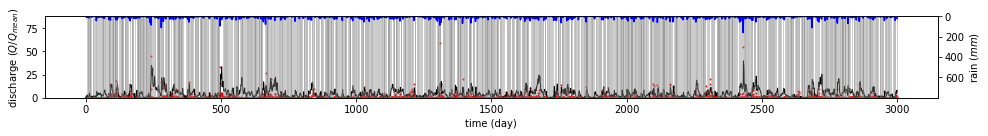

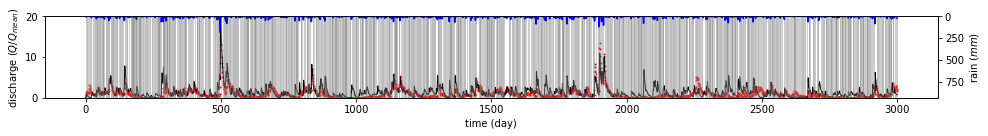

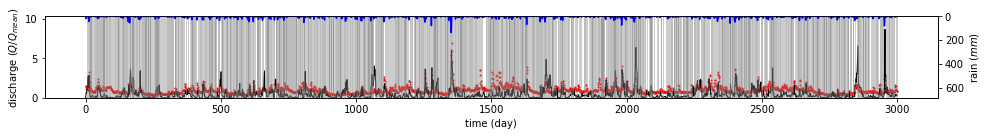

In [18]:
for i in range(5):
    fig, ax_left = plt.subplots(figsize=(16, 1.5))
    
    ax_right = ax_left.twinx()

    ax_left.plot(discharge_obs[i,:], '.',color='red',markersize =2)
    ax_left.plot(discharge_sim[i,:],color='black',linewidth=1)

    ax_right.invert_yaxis()
    ax_right.plot(rain_obs[i,:], color='blue')
    ax_right.fill_between(range(len(rain_obs[i,:])), min(rain_obs[i,:]), 1000, where=(rain_obs[i,:]==0) & (rain_obs[i,:] > -0.1), alpha=0.4, color ="gray")
    ax_left.set_ylim([0, 1.5*max(discharge_obs[i,:])])
    ax_right.set_ylim([5*max(rain_obs[i,:]),0])
    ax_left.set_xlabel('time (day)')
    ax_left.set_ylabel(r'discharge $(Q/Q_{mean})$')
    ax_right.set_ylabel(r'rain $(mm)$')#,rotation=-90)
    
    if i == 0:
            ax_right.legend(['Rain'], loc = 'upper right')
            ax_left.legend(['Observed','Simulated'], loc = 'upper left' )
    

In [19]:
# Plots with uncertainty intervals

def sde(par, rain, Temp, runs, dt =1 , T = 3000):
    
    n = int(T / dt)  # Number of time steps.
    t = np.linspace(0., T, n)  # Vector of times.
    x = np.zeros([n,runs])
    Qeff = np.ones([n,runs])
    A=par[0]; b=par[1]; k=par[2]; Qref=par[3]; ddf=par[4]; 
    Emax=par[5]; Emin=par[6];bf = par[7]; es=par[8] 
    
    E = Emax*(Temp-Temp.min())/(Temp.max()-Temp.min()) + Emin*(Temp.max()-Temp)/(Temp.max()-Temp.min())
    M = ddf*np.maximum(Temp,0)
    
    for j in range(runs):
        for i in range(n - 1):
            x[i + 1,j] =bf + x[i,j] + (rain[i]-E[i]+M[i]-Qref*((x[i,j])/k)**(1/(2-b)))*dt + (es*x[i,j])*np.random.normal(0,np.sqrt(dt),1)

        if np.isnan(np.sum(x[0:n,j]))==False:
            Qeff[:,j] = (A*(Qref*((x[0:n,j])/k)**(1/(2-b))))
        else: 
            Qeff[:,j] = np.full(n, np.inf)
    
    return Qeff 

In [20]:
# Define parameters
par0 = {'A':0.15,'b':1.0,'k':2.,'Qref':0.3,'ddf':0.0,'Emax':0.0,'Emin':0.,'bf':0.,'es':0.35}  
par1 = {'A':0.3,'b':1.0,'k':2.,'Qref':0.3,'ddf':0.2,'Emax':0.0,'Emin':0.,'bf':0.,'es':0.35}  
par2 = {'A':1.0,'b':1.0,'k':2.,'Qref':0.3,'ddf':0.0,'Emax':0.0,'Emin':0.,'bf':-1.,'es':0.35}  
par3 = {'A':0.3,'b':1.0,'k':2.,'Qref':0.3,'ddf':0.0,'Emax':0.0,'Emin':0.,'bf':0.,'es':0.45}  
par4 = {'A':.2,'b':1.0,'k':2.,'Qref':0.3,'ddf':0.0,'Emax':0.0,'Emin':0.,'bf':1.,'es':0.45}  
# as a dictionary

par = np.empty((5,9))


for i in range(5):
    par[i,:] = np.array(list(eval('{}{}'.format('par', i)).values())) # as an np.array

In [21]:
discharge_sim_en = np.zeros([5,3000, 100])

for i in range(5):
    discharge_sim_en[i,:,:] = sde(par[i,:], rain_obs[i,:], Temp_obs[i,:],runs =100)

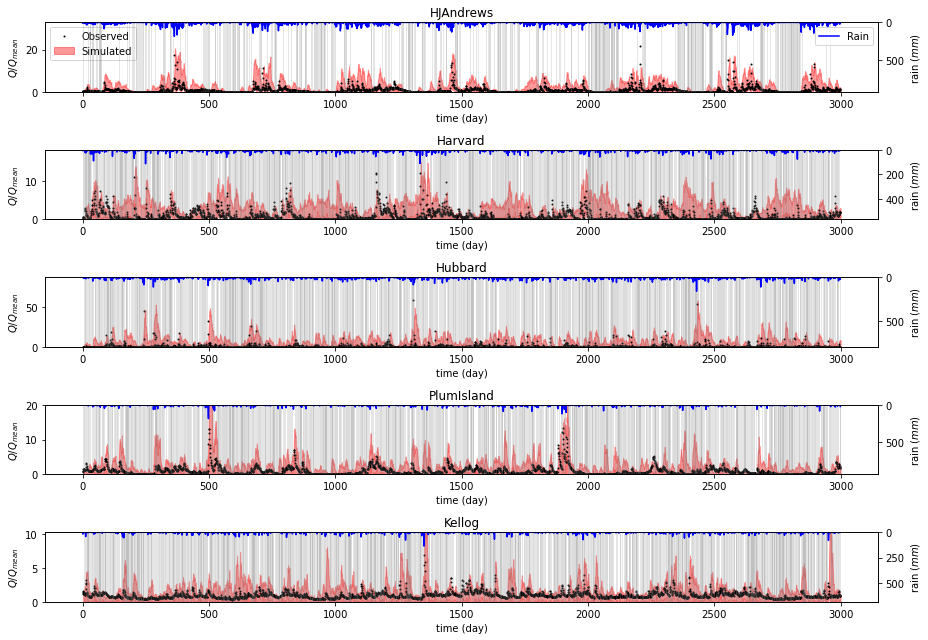

In [22]:
# Plot with parametric uncertainty
fig, ax_left = plt.subplots(5, figsize=(13, 9))
name =["HJAndrews","Harvard","Hubbard","PlumIsland","Kellog"]
for i in range(5):
    
    ax_right = ax_left[i].twinx()

    ax_left[i].plot(discharge_obs[i,:], '.',color='black',markersize =2)
    #ax_left.plot(discharge_sim[i,:],color='black',linewidth=1)
    ax_left[i].fill_between(np.linspace(0., 3000, 3000),np.percentile(discharge_sim_en[i,:,:], 5, axis=1), np.percentile(discharge_sim_en[i,:,:], 95, axis=1), color='red', alpha=0.4)

    ax_right.invert_yaxis()
    ax_right.plot(rain_obs[i,:], color='blue')
    ax_right.fill_between(range(len(rain_obs[i,:])), min(rain_obs[i,:]), 1000, where=(rain_obs[i,:]==0) & (rain_obs[i,:] > -0.1), alpha=0.2, color ="gray")
    ax_left[i].set_ylim([0, 1.5*max(discharge_obs[i,:])])
    ax_right.set_ylim([5*max(rain_obs[i,:]),0])
    ax_left[i].set_xlabel('time (day)')
    ax_left[i].set_ylabel(r'$Q/Q_{mean}$')
    ax_right.set_ylabel(r'rain $(mm)$')#,rotation=-90)
    
    if i == 0:
            ax_right.legend(['Rain'], loc = 'upper right')
            ax_left[i].legend(['Observed','Simulated'], loc = 'upper left' )
    
    ax_left[i].set_title(name[i])
    plt.tight_layout()

plt.savefig('images/hydrograph.jpg')

In [23]:
# Reliability
n=np.zeros(5)

for i in range(5):
    ci5 = np.percentile(discharge_sim_en[i,:,:], 5, axis=1)
    ci95 = np.percentile(discharge_sim_en[i,:,:], 95, axis=1)
    for j in range(3000):
        if  ci5[j] < discharge_obs[i,j] and ci95[j] > discharge_obs[i,j]:
            n[i] = n[i]+1

In [24]:
n/3000*100

array([74.7       , 56.3       , 56.56666667, 84.26666667, 89.3       ])

In [25]:
# Reliability
ns=np.zeros(5)

for i in range(5):
    mn = np.mean(discharge_sim_en[i,:,:],axis=1)
    ns[i]=1-np.mean((discharge_obs[i,:]-mn)**2)/np.mean((discharge_obs[i,:]-np.mean(discharge_obs[i,:]))**2)


In [26]:
ns

array([ 0.24499564, -0.2081556 , -1.89982388,  0.48468044, -0.20179126])

In [27]:
np.mean(discharge_sim_en[1,:,:],axis=1)

array([0.        , 0.2835    , 0.23729447, ..., 1.41875273, 1.5859172 ,
       1.47101905])

In [28]:
from PyIF import te_compute as te
rand = np.random.RandomState(seed=23)

TE=np.zeros([5,3])

for i in range(5):
    X_1000 = rain_obs[i,:]
    Y_1000 = discharge_obs[i,:]
    Y_en = discharge_sim_en[i,:,1]
    Y_mn = np.mean(discharge_sim_en[i,:,:],axis=1)

    TE[i,0] = te.te_compute(X_1000, Y_1000, k=1, embedding=1, safetyCheck=False, GPU=False)
    TE[i,1] = te.te_compute(X_1000,Y_mn, k=1, embedding=1, safetyCheck=False, GPU=False)
    TE[i,2] = te.te_compute(X_1000, Y_en , k=1, embedding=1, safetyCheck=False, GPU=False)

In [29]:
TE

array([[0.78885512, 0.87699467, 0.97159567],
       [3.55392328, 4.05231218, 3.93883962],
       [3.20345607, 2.99357432, 2.99952991],
       [3.62020111, 3.95854095, 3.87624055],
       [3.7216385 , 4.32517488, 4.23527991]])

In [30]:
np.mean(discharge_sim_en[2,:,:],axis=1)

array([0.        , 0.12      , 0.52811473, ..., 3.43792804, 2.67468345,
       2.18013404])

HJAndrews
Hydrometeorological variables in this watershed are:
['Discharge', 'Precipitation', 'AirTemperature', 'SolarRadiation', 'RelativeHumidity', 'WindDirection', 'WindSpeed', 'SWE', 'SnowDepth', 'Snowmelt', 'VaporPressure', 'SoilTemperature', 'SoilMoisture']


<AxesSubplot:xlabel='DateTime', ylabel='evapotranspiration [mm/d]'>

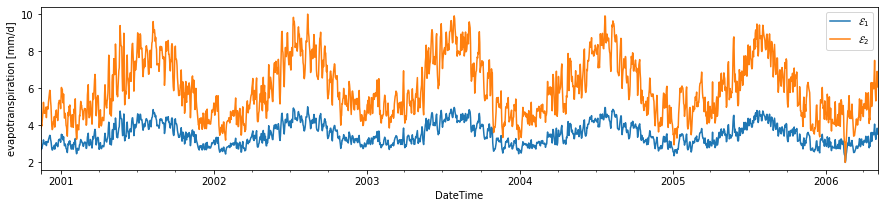

In [31]:
Temp = (get_data(4,['AirTemperature'])[15750:17750]).mean(axis=1)


E_max1 = 5
E_max2 = 10
E_min = 2

E1 = E_max1*(Temp-Temp.min())/(Temp.max()-Temp.min())+ E_min*(Temp.max()-Temp)/(Temp.max()-Temp.min())
E2 = E_max2*(Temp-Temp.min())/(Temp.max()-Temp.min())+ E_min*(Temp.max()-Temp)/(Temp.max()-Temp.min())

example_evaporation = pd.DataFrame({
    r'$\mathcal{E}_1$': E1,
    r'$\mathcal{E}_2$': E2})

example_evaporation.plot(ylabel='evapotranspiration [mm/d]',figsize =(15,3))

HJAndrews
Hydrometeorological variables in this watershed are:
['Discharge', 'Precipitation', 'AirTemperature', 'SolarRadiation', 'RelativeHumidity', 'WindDirection', 'WindSpeed', 'SWE', 'SnowDepth', 'Snowmelt', 'VaporPressure', 'SoilTemperature', 'SoilMoisture']


<AxesSubplot:xlabel='DateTime', ylabel='snowmelt [mm/d]'>

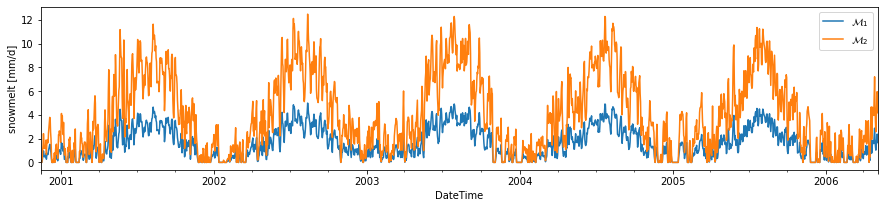

In [32]:
Temp = (get_data(4,['AirTemperature'])[15750:17750]).mean(axis=1)


ddf1 = 0.2
ddf2 = 0.5


M1 = ddf1*np.maximum(Temp,0)
M2 = ddf2*np.maximum(Temp,0)

example_snowmelt = pd.DataFrame({
    r'$\mathcal{M}_1$': M1,
    r'$\mathcal{M}_2$': M2})

example_snowmelt.plot(ylabel='snowmelt [mm/d]', figsize =(15,3))

In [33]:
# Define parameters
par0 = {'A':0.2,'b':1.0,'k':2.,'Qref':0.3,'ddf':0.0,'Emax':0.0,'Emin':0.,'bf':0.,'es':0.35}  
par1 = {'A':0.3,'b':1.0,'k':2.,'Qref':0.3,'ddf':0.2,'Emax':0.0,'Emin':0.,'bf':0.,'es':0.25}  
par2 = {'A':1.0,'b':1.0,'k':2.,'Qref':0.3,'ddf':0.0,'Emax':0.0,'Emin':0.,'bf':0.,'es':0.25}  
par3 = {'A':0.4,'b':1.0,'k':2.,'Qref':0.3,'ddf':0.0,'Emax':0.0,'Emin':0.,'bf':0.,'es':0.1}  
par4 = {'A':0.2,'b':1.0,'k':2.,'Qref':0.3,'ddf':0.0,'Emax':0.0,'Emin':0.,'bf':0.,'es':0.35}  
# as a dictionary

par = np.empty((5,9))


for i in range(5):
    par[i,:] = np.array(list(eval('{}{}'.format('par', i)).values())) # as an np.array

# Inference

In [34]:
def dist_metric(d,x):
    return np.sum((d - x)**2)/np.sum((d - np.mean(d))**2)
#dist_metric(data, discharge[0:1500])

In [35]:
#HJA priors =  [('uniform', [20000, 400000]),('uniform', [0.01,2]),('uniform', [0.005,0.06]),('uniform', [0.001,0.04])] HJ Andrews
#kellogg priors =  [('uniform', [350, 530]),('uniform', [0.01,2]),('uniform', [0.0001,0.01]),('uniform', [0.0001,0.05])]
#par = {'A':1,'b':1.3,'k':2,'So':1,'Qref':0.3,'ddf':0.3,'Emax':0.1,'Emin':0.,'es':0.05,'er':0.1} 
#par  = [1, 1., 2,0.3, 0., 0., 0., 0.005,0.4] 
priors0 =  [('uniform', [0.1, 0.5]),('uniform', [0,1.5]),         # A,b
           ('uniform', [0.8, 2]),                                   # k,
           ('uniform', [0.1, 1.5]),('uniform', [0.0,2]),         # Qref, ddf
           ('uniform', [3, 6]),('uniform', [0.0,2]),       # Emax, Emin
           ('uniform', [0.,0.01]),                        # bf
           ('uniform', [0.3,0.5])]# es, er

priors1 =  [('uniform', [0.1, 0.5]),('uniform', [0,1.5]),         # A,b
           ('uniform', [0.8, 2]),                                   # k,
           ('uniform', [0.1, 1.5]),('uniform', [0.0,2]),         # Qref, ddf
           ('uniform', [3, 6]),('uniform', [0.0,2]),       # Emax, Emin
           ('uniform', [0.,0.01]),                        # bf
           ('uniform', [0.1,0.5])]# es, er

priors2 =  [('uniform', [0.7, 1.2]),('uniform', [0,1.5]),         # A,b
           ('uniform', [0.8, 2]),                                   # k,
           ('uniform', [0.1, 1.5]),('uniform', [0.0,2]),         # Qref, ddf
           ('uniform', [3, 6]),('uniform', [0.0,2]),       # Emax, Emin
           ('uniform', [0.,0.01]),                        # bf
           ('uniform', [0.1,0.5])]# es, er


priors3 =  [('uniform', [0.2, 0.8]),('uniform', [0,1.5]),         # A,b
           ('uniform', [0.8, 2]),                                   # k,
           ('uniform', [0.1, 1.5]),('uniform', [0.0,2]),         # Qref, ddf
           ('uniform', [3, 6]),('uniform', [0.0,2]),       # Emax, Emin
           ('uniform', [0.,0.01]),                        # bf
           ('uniform', [0.1,0.5])]# es, er

priors4 =  [('uniform', [0.1, 0.4]),('uniform', [0,1.5]),         # A,b
           ('uniform', [0.8, 2]),                                   # k,
           ('uniform', [0.1, 1.5]),('uniform', [0.0,2]),         # Qref, ddf
           ('uniform', [3, 6]),('uniform', [0.0,2]),       # Emax, Emin
           ('uniform', [0.,0.01]),                        # bf
           ('uniform', [0.3,0.5])]# es, er

priors = [priors0,priors1,priors2,priors3,priors4]

In [38]:
i=0
prop={'dfunc':dist_metric, 'tol_type':'exp','outfile':('{}{}{}'.format('data/', i,'.txt')), 'verbose':1, 'adapt_t': True, 'mp': True, 'num_proc':10}
sampler = astroabc.ABC_class(9,50,discharge_obs[i,0:1500],[3,0.5],100,priors[i],**prop)
def sde2(parm):
    return sde(par=parm, rain = rain_obs[i,:], Temp = Temp_obs[i,:], runs=1, dt =1 , T = 1500).flatten()

start = timeit.default_timer()
sampler.sample(sde2)
stop = timeit.default_timer()
print('Time: ', stop - start) 

<ipython-input-19-1b7f0b25bd66>:17: RuntimeWarning: invalid value encountered in double_scalars
  x[i + 1,j] =bf + x[i,j] + (rain[i]-E[i]+M[i]-Qref*((x[i,j])/k)**(1/(2-b)))*dt + (es*x[i,j])*np.random.normal(0,np.sqrt(dt),1)
<ipython-input-19-1b7f0b25bd66>:17: RuntimeWarning: invalid value encountered in double_scalars
  x[i + 1,j] =bf + x[i,j] + (rain[i]-E[i]+M[i]-Qref*((x[i,j])/k)**(1/(2-b)))*dt + (es*x[i,j])*np.random.normal(0,np.sqrt(dt),1)
<ipython-input-19-1b7f0b25bd66>:17: RuntimeWarning: invalid value encountered in double_scalars
  x[i + 1,j] =bf + x[i,j] + (rain[i]-E[i]+M[i]-Qref*((x[i,j])/k)**(1/(2-b)))*dt + (es*x[i,j])*np.random.normal(0,np.sqrt(dt),1)
<ipython-input-19-1b7f0b25bd66>:17: RuntimeWarning: invalid value encountered in double_scalars
  x[i + 1,j] =bf + x[i,j] + (rain[i]-E[i]+M[i]-Qref*((x[i,j])/k)**(1/(2-b)))*dt + (es*x[i,j])*np.random.normal(0,np.sqrt(dt),1)
<ipython-input-19-1b7f0b25bd66>:17: RuntimeWarning: invalid value encountered in double_scalars
  x[i + 

	 	
	 ########################     astroABC     ########################	
	 	
	 Npart=50 	 numt=100 	 tol=[3.0000,0.5000] exp
	 Priors= [('uniform', [0.1, 0.5]), ('uniform', [0, 1.5]), ('uniform', [0.8, 2]), ('uniform', [0.1, 1.5]), ('uniform', [0.0, 2]), ('uniform', [3, 6]), ('uniform', [0.0, 2]), ('uniform', [0.0, 0.01]), ('uniform', [0.3, 0.5])]


<ipython-input-19-1b7f0b25bd66>:20: RuntimeWarning: invalid value encountered in power
  Qeff[:,j] = (A*(Qref*((x[0:n,j])/k)**(1/(2-b))))


	 Step: 0 	 tol: 3.0 	 Params: [0.25422331057286096, 0.18197163433991803, 1.3891305600748527, 0.2653267193454718, 1.1491262603164973, 4.305857904106581, 0.692507549695127, 0.005425317986190853, 0.31688719121572095]
	 Step: 1 	 tol: 2.2539274339587037 	 Params: [0.21246029753836915, 0.027334820548365685, 1.4714334767006978, 0.16111293896517906, 1.4420654941440276, 3.9591398404911784, 0.6634285282915351, 0.004421158427723144, 0.3032747295613739]
	 Step: 2 	 tol: 1.723922220769252 	 Params: [0.1439266559246229, 0.12778666674434797, 1.314450175412499, 0.16520955184796274, 1.259531159177164, 3.8038318215686906, 0.6444026049419534, 0.0073311427793334594, 0.30130694776274985]
	 Step: 3 	 tol: 1.2447452353049087 	 Params: [0.16116343672532896, 0.06513714110077301, 1.3001102937861702, 0.16676439786835304, 1.2556277375313691, 3.8184465974233888, 0.22166605480742368, 0.006253623969452263, 0.30327417977921967]
	 Step: 4 	 tol: 1.1771744490512113 	 Params: [0.16004494553739654, 0.1045655862269824, 

<ipython-input-19-1b7f0b25bd66>:20: RuntimeWarning: invalid value encountered in power
  Qeff[:,j] = (A*(Qref*((x[0:n,j])/k)**(1/(2-b))))


	 Step: 6 	 tol: 1.1198858637774287 	 Params: [0.20097997130032444, 0.06008785708446254, 1.1473471241818536, 0.1766533392004632, 0.9890644496714331, 3.4636417981568686, 0.21237571455395254, 0.0076567495492775375, 0.3045815457399327]
	 Step: 7 	 tol: 1.0946548142350732 	 Params: [0.2806607834453334, 0.06307730290597281, 1.592002158481788, 0.14935674265678536, 0.8993457739422116, 3.39175402991662, 0.4947789493667178, 0.008522036350544597, 0.3034078323142857]
	 Step: 8 	 tol: 1.06859099176742 	 Params: [0.2237467889694774, 0.08090596073450626, 1.304003652261074, 0.20435824899171184, 0.7042203981936771, 4.497165178262608, 0.25179785522079434, 0.007296102170576211, 0.30806865355615287]


<ipython-input-19-1b7f0b25bd66>:20: RuntimeWarning: invalid value encountered in power
  Qeff[:,j] = (A*(Qref*((x[0:n,j])/k)**(1/(2-b))))
<ipython-input-19-1b7f0b25bd66>:20: RuntimeWarning: invalid value encountered in power
  Qeff[:,j] = (A*(Qref*((x[0:n,j])/k)**(1/(2-b))))


	 Step: 9 	 tol: 1.0515039226999274 	 Params: [0.25698188452395176, 0.08422428273246553, 1.4370361694256744, 0.20985094043876018, 0.811240403933752, 4.763867177095903, 0.3094431898576174, 0.0076348805150846626, 0.30518258982156815]


<ipython-input-19-1b7f0b25bd66>:20: RuntimeWarning: invalid value encountered in power
  Qeff[:,j] = (A*(Qref*((x[0:n,j])/k)**(1/(2-b))))


	 Step: 10 	 tol: 1.032986875127455 	 Params: [0.21340491831722183, 0.07574535569659432, 1.4896043560966392, 0.24763453955539788, 0.5905383124380151, 4.5019355854911725, 0.3101253100212474, 0.007730616460333913, 0.3030803216230419]


<ipython-input-19-1b7f0b25bd66>:20: RuntimeWarning: invalid value encountered in power
  Qeff[:,j] = (A*(Qref*((x[0:n,j])/k)**(1/(2-b))))


	 Step: 11 	 tol: 1.0036965060327365 	 Params: [0.19561434428950886, 0.11624771516762665, 1.545175164693275, 0.2518949114411774, 0.5682400104928736, 3.649535298384203, 0.47183935639246727, 0.0051626570096569525, 0.3035668974628207]


<ipython-input-19-1b7f0b25bd66>:20: RuntimeWarning: invalid value encountered in power
  Qeff[:,j] = (A*(Qref*((x[0:n,j])/k)**(1/(2-b))))


	 Step: 12 	 tol: 0.9905108921415151 	 Params: [0.19507140287640434, 0.07481815309915457, 1.4985223207764597, 0.2718529373495536, 0.6235893677774248, 4.223561777994471, 0.4512659297062403, 0.0049410674429508404, 0.30842137724244484]
	 Step: 13 	 tol: 0.9696641507081399 	 Params: [0.20348358572557312, 0.13480096640890812, 1.672941877975846, 0.301519114636734, 0.47218340052005814, 3.7826224288786703, 0.5058568302939332, 0.004466603078369465, 0.3014234329160274]
	 Step: 14 	 tol: 0.9551802084312438 	 Params: [0.2582126952526066, 0.07240871043684986, 1.5737684180750195, 0.2796142584784118, 0.4094614730571175, 3.3167390857240697, 0.4206631392384564, 0.005208473768260023, 0.3086984581621769]


<ipython-input-19-1b7f0b25bd66>:20: RuntimeWarning: invalid value encountered in power
  Qeff[:,j] = (A*(Qref*((x[0:n,j])/k)**(1/(2-b))))


	 Step: 15 	 tol: 0.9418807211468376 	 Params: [0.24381938224422925, 0.04805543924631401, 1.612221517896774, 0.3508375684476516, 0.44501668757734036, 4.3576043890798, 0.08930090781690753, 0.0037096382002298756, 0.30557486354171504]
	 Step: 16 	 tol: 0.9209855238479733 	 Params: [0.16178603492770535, 0.24589648080473847, 1.478699681467214, 0.3334765656116259, 0.4540448909285527, 4.488806892142731, 0.38291611852532126, 0.0041158362243127414, 0.30569123384384533]
	 Step: 17 	 tol: 0.9065099146358631 	 Params: [0.14113567466709706, 0.27155507069632473, 1.5526303056822197, 0.4016294550502629, 0.45495896930947344, 3.887387656540325, 0.20824756410157808, 0.006019915622425882, 0.3050357885808797]
	 Step: 18 	 tol: 0.8871010863340977 	 Params: [0.14534023437653168, 0.24377571731144518, 1.7230825643731997, 0.452365473731069, 0.4504378949797813, 3.878238507629721, 0.0951073993733217, 0.0065249097946629975, 0.3041517683336828]


<ipython-input-19-1b7f0b25bd66>:17: RuntimeWarning: overflow encountered in double_scalars
  x[i + 1,j] =bf + x[i,j] + (rain[i]-E[i]+M[i]-Qref*((x[i,j])/k)**(1/(2-b)))*dt + (es*x[i,j])*np.random.normal(0,np.sqrt(dt),1)
<ipython-input-19-1b7f0b25bd66>:17: RuntimeWarning: invalid value encountered in add
  x[i + 1,j] =bf + x[i,j] + (rain[i]-E[i]+M[i]-Qref*((x[i,j])/k)**(1/(2-b)))*dt + (es*x[i,j])*np.random.normal(0,np.sqrt(dt),1)
<ipython-input-19-1b7f0b25bd66>:17: RuntimeWarning: overflow encountered in double_scalars
  x[i + 1,j] =bf + x[i,j] + (rain[i]-E[i]+M[i]-Qref*((x[i,j])/k)**(1/(2-b)))*dt + (es*x[i,j])*np.random.normal(0,np.sqrt(dt),1)
<ipython-input-19-1b7f0b25bd66>:17: RuntimeWarning: invalid value encountered in add
  x[i + 1,j] =bf + x[i,j] + (rain[i]-E[i]+M[i]-Qref*((x[i,j])/k)**(1/(2-b)))*dt + (es*x[i,j])*np.random.normal(0,np.sqrt(dt),1)
<ipython-input-19-1b7f0b25bd66>:17: RuntimeWarning: overflow encountered in double_scalars
  x[i + 1,j] =bf + x[i,j] + (rain[i]-E[i]+M[i

	 Step: 19 	 tol: 0.8764704199121828 	 Params: [0.14177736641610067, 0.1492430667989368, 1.2650635327165265, 0.48851105111877396, 0.43383915683158575, 3.6419189296963337, 0.09064714271493807, 0.007753577269429505, 0.3043173662930718]
	 Step: 20 	 tol: 0.860916787946666 	 Params: [0.14700888181795163, 0.18643378161618596, 1.1919505754461985, 0.4050878522976387, 0.40620423172014425, 3.639716960369475, 0.26093455930430925, 0.00583569459508147, 0.3031561785557406]


<ipython-input-19-1b7f0b25bd66>:17: RuntimeWarning: overflow encountered in double_scalars
  x[i + 1,j] =bf + x[i,j] + (rain[i]-E[i]+M[i]-Qref*((x[i,j])/k)**(1/(2-b)))*dt + (es*x[i,j])*np.random.normal(0,np.sqrt(dt),1)
<ipython-input-19-1b7f0b25bd66>:17: RuntimeWarning: invalid value encountered in add
  x[i + 1,j] =bf + x[i,j] + (rain[i]-E[i]+M[i]-Qref*((x[i,j])/k)**(1/(2-b)))*dt + (es*x[i,j])*np.random.normal(0,np.sqrt(dt),1)
<ipython-input-19-1b7f0b25bd66>:17: RuntimeWarning: overflow encountered in double_scalars
  x[i + 1,j] =bf + x[i,j] + (rain[i]-E[i]+M[i]-Qref*((x[i,j])/k)**(1/(2-b)))*dt + (es*x[i,j])*np.random.normal(0,np.sqrt(dt),1)
<ipython-input-19-1b7f0b25bd66>:17: RuntimeWarning: invalid value encountered in add
  x[i + 1,j] =bf + x[i,j] + (rain[i]-E[i]+M[i]-Qref*((x[i,j])/k)**(1/(2-b)))*dt + (es*x[i,j])*np.random.normal(0,np.sqrt(dt),1)
<ipython-input-19-1b7f0b25bd66>:17: RuntimeWarning: overflow encountered in double_scalars
  x[i + 1,j] =bf + x[i,j] + (rain[i]-E[i]+M[i

	 Step: 21 	 tol: 0.8488800113263318 	 Params: [0.15169900418655097, 0.17261802491649247, 1.6856873273098534, 0.48089914461730693, 0.32009576343155316, 2.9525273400973773, 0.038556075775038, 0.004974638711656455, 0.30295386066478247]


/home/waniomar/anaconda3/lib/python3.8/site-packages/astroabc/variance.py:200: RuntimeWarning: divide by zero encountered in double_scalars
  coeff = wgt.sum() / (wgt.sum()**2 - (wgt**2).sum())
/home/waniomar/anaconda3/lib/python3.8/site-packages/astroabc/variance.py:205: RuntimeWarning: invalid value encountered in double_scalars
  var[kk][kk] = coeff*np.sum(wgt * (pms[:,kk] - wgt_mean[kk])**2)
Process ForkPoolWorker-37:
Process ForkPoolWorker-33:
Process ForkPoolWorker-36:
Process ForkPoolWorker-40:
Process ForkPoolWorker-35:
Process ForkPoolWorker-31:
Process ForkPoolWorker-39:
Process ForkPoolWorker-32:
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
  File "/home/waniomar/anaconda3/lib/python3.8/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
Process ForkPoolWorker-38:
Traceback (most recent call last):
  File "/home/waniomar/anaconda3/

  File "<ipython-input-37-d3ebd152a3ae>", line 5, in sde2
    return sde(par=parm, rain = rain_obs[i,:], Temp = Temp_obs[i,:], runs=1, dt =1 , T = 1500).flatten()
  File "<ipython-input-19-1b7f0b25bd66>", line 17, in sde
    x[i + 1,j] =bf + x[i,j] + (rain[i]-E[i]+M[i]-Qref*((x[i,j])/k)**(1/(2-b)))*dt + (es*x[i,j])*np.random.normal(0,np.sqrt(dt),1)
KeyboardInterrupt


KeyboardInterrupt: 

  File "<ipython-input-19-1b7f0b25bd66>", line 17, in sde
    x[i + 1,j] =bf + x[i,j] + (rain[i]-E[i]+M[i]-Qref*((x[i,j])/k)**(1/(2-b)))*dt + (es*x[i,j])*np.random.normal(0,np.sqrt(dt),1)
  File "/home/waniomar/anaconda3/lib/python3.8/multiprocessing/pool.py", line 48, in mapstar
    return list(map(*args))
  File "/home/waniomar/anaconda3/lib/python3.8/multiprocessing/pool.py", line 125, in worker
    result = (True, func(*args, **kwds))
KeyboardInterrupt
  File "<ipython-input-19-1b7f0b25bd66>", line 17, in sde
    x[i + 1,j] =bf + x[i,j] + (rain[i]-E[i]+M[i]-Qref*((x[i,j])/k)**(1/(2-b)))*dt + (es*x[i,j])*np.random.normal(0,np.sqrt(dt),1)
KeyboardInterrupt
KeyboardInterrupt
  File "/home/waniomar/anaconda3/lib/python3.8/site-packages/astroabc/abc_class.py", line 374, in classstep
    x = self.model(trial_t)
  File "<ipython-input-19-1b7f0b25bd66>", line 17, in sde
    x[i + 1,j] =bf + x[i,j] + (rain[i]-E[i]+M[i]-Qref*((x[i,j])/k)**(1/(2-b)))*dt + (es*x[i,j])*np.random.normal(0,np.sqr

In [ ]:
i=0
dist_metric(d=discharge_obs[i,0:1500],x=sde(par=par[i,:], rain = rain_obs[i,:], Temp = Temp_obs[i,:], runs=1, dt =1 , T = 1500).flatten())

In [ ]:
par[i,:]

In [ ]:
for i in range(2):
    prop={'dfunc':dist_metric, 'tol_type':'exp','outfile':('{}{}{}'.format('data/', i,'.txt')), 'verbose':1, 'adapt_t': True, 'mp': True, 'num_proc':10}
    sampler = astroabc.ABC_class(9,50,discharge_obs[i,0:1500],[30,1],100,priors[i],**prop)
    def sde2(parm):
        return sde(par=parm, rain = rain_obs[i,:], Temp = Temp_obs[i,:], runs=1, dt =1 , T = 1500).flatten()
    
    start = timeit.default_timer()
    sampler.sample(sde2)
    stop = timeit.default_timer()
    print('Time: ', stop - start) 


# Import samples

In [ ]:
# import  samples
data = ("data/0old.txt")
samples  =  pd.DataFrame(np.loadtxt('data/0old.txt', skiprows=1))
samplespar = samples[samples.columns[0:9]]


In [ ]:
# Plot the trace of samples 

samplespar.plot(kind='line', figsize=[30,5], fontsize = 20, title = 'Sample traces')
#samplespar.plot(kind='hist',y ='AMS_cdx', figsize=[30,5], fontsize = 20, title = 'Maximum annual prcipitation')

In [ ]:
fig = sns.pairplot(samplespar)
#fig.savefig('images/konza_posterior.jpg',dpi = 150)

In [ ]:
par = [np.asarray(samplespar)[:,0].mean(),np.asarray(samplespar)[:,1].mean(),
       np.asarray(samplespar)[:,2].mean(),np.asarray(samplespar)[:,3].mean(),
      np.asarray(samplespar)[:,4].mean(),np.asarray(samplespar)[:,5].mean(),
      np.asarray(samplespar)[:,6].mean(),np.asarray(samplespar)[:,7].mean(),
      np.asarray(samplespar)[:,8].mean()]
#par = np.array(samplespar)[pd.read_csv(filepath_or_buffer=data, delimiter  =' ',header =0)["\t.1"].idxmax(),:]

In [ ]:
par

In [ ]:
#par = np.array(samplespar)[samples[10].idxmin(),:]
#A,b,k,So,Qref,ddf,Emax,Emin,es,er

# Hj Andrews par = {'A':0.2,'b':1.0,'k':2,'Qref':0.3,'ddf':0.0,'Emax':0.0,'Emin':0.,'es':0.1} 
# Kellog par = {'A':0.2,'b':1.0,'k':2,'Qref':0.3,'ddf':0.1,'Emax':0.1,'Emin':0.,'es':0.2} 
# Hubbard par = {'A':1,'b':1.0,'k':1.2,'Qref':0.2,'ddf':0,'Emax':0,'Emin':0.,'es':0.2} 
par = {'A':2.8,'b':1.0,'k':0.8,'Qref':0.2,'ddf':0.0,'Emax':0.0,'Emin':0.,'es':0.2} 
# as a dictionary

par = np.array(list(par.values())) # as an np.array

In [ ]:
n =3000
x = np.zeros([n,500])


dt = 1  # Time step.
T = 3000.  # Total time.
n = int(T / dt)  # Number of time steps.
t = np.linspace(0., T, n)  # Vector of times.

A=par[0]; b=par[1]; k=par[2]; Qref=par[3]; ddf=par[4]; Emax=par[5]; Emin=par[6];es=par[7] 
    
E = Emax*(Temp-Temp.min())/(Temp.max()-Temp.min()) + Emin*(Temp.max()-Temp)/(Temp.max()-Temp.min())
M = ddf*np.maximum(Temp,0)

for j in range(499):
    for i in range(n - 1):
        x[i + 1,j] = x[i,j] + (rain[i]-E[i]+M[i]-Qref*((x[i,j])/k)**(1/(2-b)))*dt + (es*x[i,j])*np.random.normal(0,np.sqrt(dt),1)
    

sim =  (A*(Qref*((x[0:n])/k)**(1/(2-b))))

# for j in range(499):
#     for i in range(n - 1):
#         x[i + 1,j] = x[i,j] + 1*rain[i]*dt + 0*par[1]*sweb[i]*temp[i]*dt -1/par[0]*x[i,j]*dt + \
#         1*(np.sqrt(par[3])*x[i,j]+np.sqrt(par[4])*rain[i])*np.random.normal(0,np.sqrt(dt),1)+ \
#         np.sqrt(par[5])*np.random.lognormal(0,np.sqrt(dt),1)
# sim = 1/par[0]*par[2]*x

In [ ]:
plt.style.use('seaborn-darkgrid')

fig, ax = plt.subplots(2,figsize=(18, 12))
fig.suptitle('Rainfall-Storage Modeling', fontsize =30)
fig.subplots_adjust(hspace = 0.4)

ax[0].plot(t, rain, color='blue')
ax[1].plot(t,sim, color = 'gray')
ax[1].plot(t,sim[:,10], color = 'red')
ax[1].plot(t,discharge, 'k.', markersize = 2 )

#ax[0].set_ylim([0,2])
ax[0].set_xlabel('', fontsize = 25)
ax[0].set_ylabel('rain(t)', fontsize = 25)
ax[0].tick_params(axis='both', which='major', labelsize=18)

#ax[1].set_ylim([0,4])
ax[1].set_xlabel('time (in days)', fontsize = 25)
ax[1].set_ylabel('discharge(t)', fontsize = 25)
#ax[1].set_title('stochastic differential equation: ' r'$dS_t= [r_t-\frac{1}{K}(1+\frac{\beta}{2})S_t]dt+(\sqrt{\frac{\beta}{K}}S_t)dW_t$', fontsize =25)
ax[1].tick_params(axis='both', which='major', labelsize=18)

#fig.savefig('images/konza_single.jpg',dpi = 150)

In [ ]:
# Make uncertainty intervals

plt.style.use('seaborn-darkgrid')

fig, ax = plt.subplots(2,figsize=(18, 12))
fig.suptitle('Rainfall-Storage Modeling', fontsize =30)
fig.subplots_adjust(hspace = 0.4)

ax[0].plot(t, rain, color='blue')
#ax[1].plot(t,np.percentile(sim, 5, axis=1), color = 'gray')
#ax[1].plot(t,np.percentile(sim, 95, axis=1), color = 'gray')
plt.fill_between(t,np.percentile(sim, 5, axis=1), np.percentile(sim, 95, axis=1), color='gray', alpha=0.5)
#ax[1].plot(t,sim.mean(axis=1), color = 'red')
ax[1].plot(t,discharge, 'k.', markersize = 2 )

#ax[0].set_ylim([0,2])
ax[0].set_xlabel('', fontsize = 25)
ax[0].set_ylabel('rain(t)', fontsize = 25)
plt.axvline(1500 , 0,1000000, color = 'red')
ax[0].tick_params(axis='both', which='major', labelsize=18)

#ax[1].set_ylim([0,4])
ax[1].set_xlabel('time (in days)', fontsize = 25)
ax[1].set_ylabel('discharge(t)', fontsize = 25)
#ax[1].set_title('stochastic differential equation: ' r'$dS_t= [r_t-\frac{1}{K}(1+\frac{\beta}{2})S_t]dt+(\sqrt{\frac{\beta}{K}}S_t)dW_t$', fontsize =25)
ax[1].tick_params(axis='both', which='major', labelsize=18)

#plt.text(900, 34000, 'Period of inference', fontsize=15,  color='red')
#plt.text(1550, 34000, 'Period of validation', fontsize=15,  color='red')
#annotation
#ax.plot([33.5], [2.5], 'o')
#ax.annotate('peak', xy=(33.5, 2.5), xytext=(40, 4), fontsize=12,
#            arrowprops=dict(facecolor='black', shrink=0.05))

#fig.savefig('images/konza.jpg',dpi = 150)

In [ ]:
# With parametric uncertainty

n =3000
x = np.zeros([n,200])
sim = np.zeros([n,200]) 
par = np.array(samplespar)[np.random.randint(300,size =200)]

for j in range(199):
    A=par[j,0]; b=par[j,1]; k=par[j,2];Qref=par[j,3]; ddf=par[j,4];Emax=par[j,5]; Emin=par[j,6];es=par[j,7]
    
    E = Emax*(Temp-Temp.min())/(Temp.max()-Temp.min()) + Emin*(Temp.max()-Temp)/(Temp.max()-Temp.min())
    M = ddf*np.maximum(Temp,0)
    
    for i in range(n - 1):
        x[i + 1,j] = x[i,j] + (rain[i]-E[i]+M[i]-Qref*((x[i,j]-0*So)/k)**(1/(2-b)))*dt + (es*x[i,j])*np.random.normal(0,np.sqrt(dt),1)
    sim[:,j] =  (A*(Qref*((x[:,j]-0*So)/k)**(1/(2-b))))
 


In [ ]:
plt.style.use('seaborn-darkgrid')

fig, ax = plt.subplots(2,figsize=(18, 12))
fig.suptitle('Rainfall-Storage Modeling', fontsize =30)
fig.subplots_adjust(hspace = 0.4)

ax[0].plot(t, rain, color='blue')
ax[1].plot(t,sim, color = 'gray')
ax[1].plot(t,sim.mean(axis=1), color = 'red')
ax[1].plot(t,discharge, 'k.', markersize = 2 )

#ax[0].set_ylim([0,2])
ax[0].set_xlabel('', fontsize = 25)
ax[0].set_ylabel('rain(t)', fontsize = 25)
ax[0].tick_params(axis='both', which='major', labelsize=18)

#ax[1].set_ylim([0,4])
ax[1].set_xlabel('time (t)', fontsize = 25)
ax[1].set_ylabel('discharge(t)', fontsize = 25)
#ax[1].set_title('stochastic differential equation: ' r'$dS_t= [r_t-\frac{1}{K}(1+\frac{\beta}{2})S_t]dt+(\sqrt{\frac{\beta}{K}}S_t)dW_t$', fontsize =25)
ax[1].tick_params(axis='both', which='major', labelsize=18)

#fig.savefig('SDE_test2.jpg',dpi = 150)

# Create the distribution of time to peak

In [ ]:
from scipy.signal import argrelextrema

# for local maxima
dis_max =np.asarray(argrelextrema(discharge, np.greater))[0,:]
rain_max =np.asarray(argrelextrema(rain, np.greater))[0,:]

type(dis_max)

# for local minima
#argrelextrema(x, np.less)

In [ ]:
rain_max.shape

In [ ]:
sns.kdeplot(rain_max, bw = 0.5)

In [ ]:
from PyIF import te_compute as te
import numpy as np
rand = np.random.RandomState(seed=23)

X_1000 = rain
Y_1000 = discharge

TE = te.te_compute(X_1000, Y_1000, k=1, embedding=2, safetyCheck=False, GPU=False)

print(TE)

# Performance

In [ ]:

ci5 = np.percentile(sim, 5, axis=1)
ci95 = np.percentile(sim, 95, axis=1)

n=0
for i in range(1500):
    if  ci5[i] < discharge[i] and ci95[i] > discharge[i]:
        n = n+1

In [ ]:
#Reliability

ci5 = np.percentile(sim, 5, axis=1)
ci95 = np.percentile(sim, 95, axis=1)

n=0
for i in range(1500):
    if  ci5[1500+i] < discharge[1500+i] and ci95[1500+i] > discharge[1500+i]:
        n = n+1


In [ ]:
n/1500*100  

#HJ Andrew
# 63.3 calibration
# 67.8 validation

#Kellog
# 72.66 calibration
# 70.66 validation

#Konza 
#18.33 calibration
# 18.94 validation

# Generate dynamic plot

In [ ]:
data = sim[:,1] #Generating data.
#plt.figure(figsize = (5,5))
sns.kdeplot(data , bw = 0.5)# , fill = True)
plt.axvline(1 , 0,1, color = 'black')
plt.ylabel('dynamic probability density', fontsize = 15)
plt.xlabel('system response', fontsize = 15)
plt.legend(framealpha=1, frameon=True)
plt.title('HJ Andrews')
plt.show()

In [ ]:
%matplotlib inline
import numpy as np, matplotlib.pyplot as plt, glob, os
import IPython.display as IPdisplay, matplotlib.font_manager as fm
from scipy.integrate import odeint
from mpl_toolkits.mplot3d.axes3d import Axes3D
from PIL import Image

In [ ]:
# define the fonts to use for plots
family = 'Myriad Pro'
title_font = fm.FontProperties(family=family, style='normal', size=20, weight='normal', stretch='normal')

In [ ]:
save_folder = 'images/dynamicprobability'
if not os.path.exists(save_folder):
    os.makedirs(save_folder)

In [ ]:
def plot_phase(n):
   data = sim[n,:] #Generating data.
   max = (np.histogram(data)[1])[np.argmax((np.histogram(data))[0])]
   plt.figure(figsize = (8,5))
   sns_plot = sns.kdeplot(data , bw = 0.5)# , fill = True)
   #plt.axvline(max, 0,1, color = 'blue')
   plt.axvline(discharge[n], 0,1, color = 'black')
   plt.xlim(0, 1000000)
   plt.ylim(0, (25*10**(-6)))
   plt.ylabel('dynamic probability density', fontsize = 15)
   plt.xlabel('system response', fontsize = 15)
   plt.legend(framealpha=1, frameon=True)
   plt.title('konza')
   plt.savefig('{}/{:03d}.png'.format(save_folder, n), dpi=200, bbox_inches='tight', pad_inches=0.1)
   plt.close()

In [ ]:
def plot_phase(n):
   data = sim[n,:] #Generating data.
   max = (np.histogram(data)[1])[np.argmax((np.histogram(data))[0])]
   plt.figure(figsize = (8,5))
   sns_plot = sns.kdeplot(data , bw = 0.5)# , fill = True)
   #plt.axvline(max, 0,1, color = 'blue')
   plt.axvline(discharge[n], 0,1, color = 'black')
   plt.xlim(0, 10000)
   plt.ylim(0, (10*10**(-3)))
   plt.ylabel('dynamic probability density', fontsize = 15)
   plt.xlabel('system response', fontsize = 15)
   plt.legend(framealpha=1, frameon=True)
   plt.title('konza')
   plt.savefig('{}/{:03d}.png'.format(save_folder, n), dpi=200, bbox_inches='tight', pad_inches=0.1)
   plt.close()

In [ ]:
for n in range(140):
    plot_phase(n)

In [ ]:
# load all the static images into a list
save_folder = 'images/dynamicprobability'
images = [Image.open(image) for image in glob.glob('{}/*.png'.format(save_folder))]
gif_filepath = 'images/animated-dynamicprob_HJA.gif'

In [ ]:
# save as an animated gif
gif = images[0]
gif.info['duration'] = 800 #ms per frame
gif.info['loop'] = 0 #how many times to loop (0=infinite)
gif.save(fp=gif_filepath, format='gif', save_all=True, append_images=images[1:],quality=50)

In [ ]:
# verify that the number of frames in the gif equals the number of image files and durations
Image.open(gif_filepath).n_frames == len(images) 

In [ ]:
#IPdisplay.Image(url=gif_filepath)